In [47]:
import pandas as pd
class Individual_diets:
    "Clase que implementa el individuo en el problema de dietas"

    def __init__(self, chromosome,limits):
        self.chromosome = chromosome[:]  #  chromosome =dieta
        self.fitness = -1  #  fitness = -1
        self.limits=limits

        
    def search_limit(self, chromosome):
        for (i,j) in self.chromosome:
             for (food,l) in self.limits:
                    if food==i:
                        return l
        return 0
    
    def crossover(self, other):

        chromosome = []
        "Retorna dos nuevos individuos del cruzamiento uniforme entre self y other "
        for (i,j) in self.chromosome:
            for (i1,j1) in other.chromosome:
                if(i==i1):
                    chromosome.append((i,(j+j1)/2))
        return Individual_diets(chromosome,self.limits)

    def mutate(self):
        "Cambia aleatoriamente la cantidad de porciones de un alimento en el cromosoma"
        mutated_ind = Individual_diets(self.chromosome[:],self.limits)
        index = random.randint(0, len(mutated_ind.chromosome)-1)
        newPos = random.randint(0, self.search_limit(mutated_ind.chromosome[index]))
        food=  mutated_ind.chromosome[index][0]
        mutated_ind.chromosome[index] = (food,newPos)
        return mutated_ind


In [48]:
import random

def genetic_algorithm(population, fitness_fn, ngen=100, pmut=0.1,cal=1350):
    "Algoritmo Genetico "
    
    popsize = len(population)
    evaluate_population(population, fitness_fn,cal)  # evalua la poblacion inicial
    ibest = sorted(range(len(population)), key=lambda i: population[i].fitness)[:1]
    bestfitness = [population[ibest[0]].fitness]
    print("Poblacion inicial, best_fitness = {}".format(population[ibest[0]].fitness))
    
    for g in range(ngen):   # Por cada generacion
        
        ## Selecciona las parejas de padres para cruzamiento 
        mating_pool = select_parents_tournament(population)
        
        ## Crea la poblacion descendencia cruzando las parejas del mating pool 
        offspring_population = []
        for i in range(len(mating_pool)): 
            offspring_population.append( mating_pool[i][0].crossover(mating_pool[i][1]) ) # cruzamiento 
        
        ## Aplica el operador de mutacion con probabilidad pmut en cada hijo generado
        for i in range(len(offspring_population)):
            if random.uniform(0, 1) < pmut: 
                    offspring_population[i] = offspring_population[i].mutate()   # mutacion de una posicion

        
        ## Evalua la poblacion descendencia creada
        evaluate_population(offspring_population, fitness_fn,cal)  # evalua la poblacion inicial
        
        ## Selecciona popsize individuos para la sgte. generación de la union de la pob. actual y  pob. descendencia
        population = select_survivors(population, offspring_population, popsize)

        ## Almacena la historia del fitness del mejor individuo
        ibest = sorted(range(len(population)), key=lambda i: population[i].fitness, reverse=True)[:1]
        bestfitness.append(population[ibest[0]].fitness)
        print("generacion {}, best_fitness = {},best_cromosoma = {}".format(g, population[ibest[0]].fitness,population[ibest[0]].chromosome))
    
    return population[ibest[0]], bestfitness  

In [49]:
def evaluate_population(population, fitness_fn,cal):
    """ Evalua una poblacion de individuos con la funcion de fitness pasada """
    popsize = len(population)
    for i in range(popsize):
        if population[i].fitness == -1:    # si el individuo no esta evaluado
            population[i].fitness = fitness_fn(population[i].chromosome,cal)

In [50]:
def fitness_diet(chromosome,cal):
    """Retorna el fitness de un cromosoma en el problema de dietas """
    data=pd.read_csv('data_Alimentos.csv',delimiter=',')
    for a in range(len(chromosome)):
        i= chromosome[a][0]
        j=chromosome[a][1]
        count=0
        fit=0
        for f in data[data.columns[1]]:
            if f==i:
                fit+= (data.loc[count][3])*j
            count+=1
    fitness= cal-fit;
    return fitness

In [30]:
def tournament(population,selected,n,popsize):
    best = None
    for i in range(n):
        index= random.randint(0, popsize-1)
        ind=population[index]
        if(selected[index]!=1):
            if (best == None or ind.fitness > best.fitness):
                best = ind
                selected[i]=1
    return best
    
def select_parents_tournament(population):
    popsize = len(population)
    n=(int)(len(population)/100*5)
    selected= [0 for i in range(popsize)]
    
    for k in range(popsize):
        pool=[]
        first_parent=tournament(population,selected,n,popsize)
        second_parent= tournament(population,selected,n,popsize)
        pool.append((first_parent, second_parent))
    print (pool)   
    return pool
        

In [31]:
def select_survivors(population, offspring_population, numsurvivors):
    next_population = []
    population.extend(offspring_population) # une las dos poblaciones
    isurvivors = sorted(range(len(population)), key=lambda i: population[i].fitness)[:numsurvivors]
    for i in range(numsurvivors): next_population.append(population[isurvivors[i]])
    return next_population

In [32]:

foodlist=[('apio',2),('fresa',1),('manzana',0),('arroz',1),('aji',0),('lechuga',2),('res',1),('papa',1),('cebolla',0),('leche',0)]



In [33]:
from itertools import combinations, permutations,product
def generate_population(foodlist):
    alimentos=[]
    for (a,b)in foodlist:
        if (b==0):
            alimento=[]
            for i in range(3):
                alimento.append((a,i))
        if (b==1):
            alimento=[]
            for i in range(4,7):
                alimento.append((a,i))
        if (b==2):
            alimento=[]
            for i in range(4,7):
                alimento.append((a,i))
        alimentos.append(alimento)

    productcartesian=product(*alimentos)
    solutions=[]
    for i in productcartesian:
        solutions.append(Individual_diets(i,foodlist))
    return solutions

In [34]:
population=generate_population(foodlist)

In [35]:
population[7].chromosome

(('apio', 4),
 ('fresa', 4),
 ('manzana', 0),
 ('arroz', 4),
 ('aji', 0),
 ('lechuga', 4),
 ('res', 4),
 ('papa', 4),
 ('cebolla', 2),
 ('leche', 1))

In [63]:
best_ind, bestfitness = genetic_algorithm(population, fitness_diet, 10, 0.5,cal=1350)

Poblacion inicial, best_fitness = 874
[(<__main__.Individual_diets object at 0x7f5bf46fe2b0>, <__main__.Individual_diets object at 0x7f5bf4a076a0>)]
generacion 0, best_fitness = 1000,best_cromosoma = (('apio', 4), ('fresa', 4), ('manzana', 0), ('arroz', 4), ('aji', 0), ('lechuga', 4), ('res', 4), ('papa', 4), ('cebolla', 0), ('leche', 0))
[(<__main__.Individual_diets object at 0x7f5bf4b2e4a8>, <__main__.Individual_diets object at 0x7f5bf46b8160>)]
generacion 1, best_fitness = 1000,best_cromosoma = (('apio', 4), ('fresa', 4), ('manzana', 0), ('arroz', 4), ('aji', 0), ('lechuga', 4), ('res', 4), ('papa', 4), ('cebolla', 0), ('leche', 0))
[(<__main__.Individual_diets object at 0x7f5bf40be470>, <__main__.Individual_diets object at 0x7f5bf4851550>)]
generacion 2, best_fitness = 1000,best_cromosoma = (('apio', 4), ('fresa', 4), ('manzana', 0), ('arroz', 4), ('aji', 0), ('lechuga', 4), ('res', 4), ('papa', 4), ('cebolla', 0), ('leche', 0))
[(<__main__.Individual_diets object at 0x7f5bf4406160

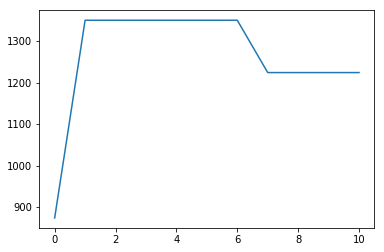

In [66]:
import matplotlib.pyplot as plt
plt.plot(bestfitness)


In [13]:
for (i,j) in population[8].chromosome:
    print(i,j)

apio 4
fresa 4
manzana 0
arroz 4
aji 0
lechuga 4
res 4
papa 4
cebolla 2
leche 2


In [51]:
a= population[7].crossover(population[8])

In [52]:
a.chromosome

[('apio', 4.0),
 ('fresa', 4.0),
 ('manzana', 0.0),
 ('arroz', 4.0),
 ('aji', 0.0),
 ('lechuga', 4.0),
 ('res', 4.0),
 ('papa', 4.0),
 ('cebolla', 2.0),
 ('leche', 1.5)]

In [53]:
 population[7].chromosome

(('apio', 4),
 ('fresa', 4),
 ('manzana', 0),
 ('arroz', 4),
 ('aji', 0),
 ('lechuga', 4),
 ('res', 4),
 ('papa', 4),
 ('cebolla', 2),
 ('leche', 1))

In [56]:
b=a.mutate()

In [57]:
b.chromosome

[('apio', 4.0),
 ('fresa', 4.0),
 ('manzana', 0.0),
 ('arroz', 1),
 ('aji', 0.0),
 ('lechuga', 4.0),
 ('res', 4.0),
 ('papa', 4.0),
 ('cebolla', 2.0),
 ('leche', 1.5)]

In [58]:
fitness_diet(b.chromosome,1350)

1255.5

In [67]:
best_ind, bestfitness = genetic_algorithm(population, fitness_diet, 10, 0.5,cal=1350)

Poblacion inicial, best_fitness = 874
[(<__main__.Individual_diets object at 0x7f5bf4bd8400>, <__main__.Individual_diets object at 0x7f5bf5304ba8>)]
generacion 0, best_fitness = 1350.0,best_cromosoma = [('apio', 4.5), ('fresa', 4.5), ('manzana', 2.0), ('arroz', 6.0), ('aji', 1.5), ('lechuga', 6.0), ('res', 6.0), ('papa', 5.0), ('cebolla', 1.0), ('leche', 0.0)]
[(<__main__.Individual_diets object at 0x7f5bf4044518>, <__main__.Individual_diets object at 0x7f5bf3f78860>)]
generacion 1, best_fitness = 1350.0,best_cromosoma = [('apio', 4.5), ('fresa', 4.5), ('manzana', 2.0), ('arroz', 6.0), ('aji', 1.5), ('lechuga', 6.0), ('res', 6.0), ('papa', 5.0), ('cebolla', 1.0), ('leche', 0.0)]
[(<__main__.Individual_diets object at 0x7f5bf3d6c2b0>, <__main__.Individual_diets object at 0x7f5bf47ad898>)]
generacion 2, best_fitness = 1350.0,best_cromosoma = [('apio', 4.5), ('fresa', 4.5), ('manzana', 2.0), ('arroz', 6.0), ('aji', 1.5), ('lechuga', 6.0), ('res', 6.0), ('papa', 5.0), ('cebolla', 1.0), ('l

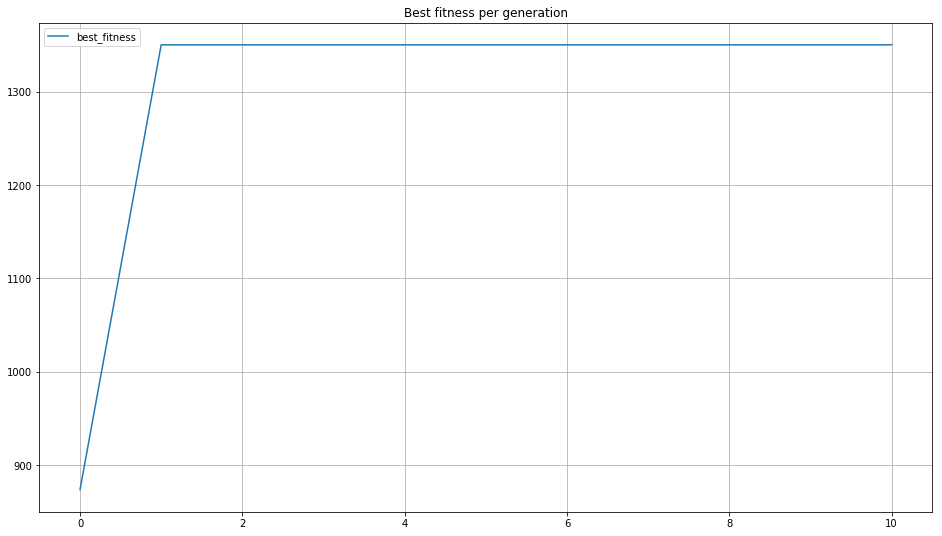

In [79]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(bestfitness, label='best_fitness')

ax.legend(loc='best')
ax.set_title('Best fitness per generation')

plt.grid(True)
plt.show()

